
 # Tree methods for classification of hand-written digits

Author: Dimitri Bourilkov 


 A decision tree: a tree like model for decisions, starting
at the root, climbing up the branches and reaching the leaves,
where each leaf represents a decision.

 https://en.wikipedia.org/wiki/Decision_tree 

 A simple example: go hiking today?

 Hike?=>Rain=yes=>NO|=no=>Very hot?=yes=>NO|no=>YES.

 For classification problems, each leaf represents our decision
assigning a data item to a class (binary or multiclass problems).

 The tree methods in scikit-learn are used to classify images of 
hand-written digits. The input images are digitized in an 8x8 
black and white matrix. We have 1797 images in total.


In [1]:
%matplotlib inline


 # Setup 

First we import the needed codes/tools from sklearn.


In [2]:
#!/usr/bin/env python3

print(" \n")
from sklearn import tree
from sklearn import metrics

import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
print("Import OK!")



 

Import OK!



 # Data Import and Preparation

We import the data and flatten (reshape) the
images before we run the tree classifier.
We split the sample in two halves:
one half for training, and the second half for testing. 
X and Y are the training images and targets 
(labels for known digits).
Xtest and Ytest are the testing images and targets (labels).


In [3]:
# Data
from sklearn import datasets
digits = datasets.load_digits()
n_samples = len(digits.images)
print(n_samples)
data = digits.images.reshape((n_samples, -1))
# training sample data & targets
X = data[:n_samples // 2]
Y = digits.target[:n_samples // 2]

# test sample data & targets==predicted
Xtest = data[n_samples // 2:]
Ytest = digits.target[n_samples // 2:]



1797



 # Simple Decision Trees

Now we train the classifier (fit) and test it on the
independent (unseen) test sample. 


In [4]:
# Tree
mytree = tree.DecisionTreeClassifier()
mytree.fit(X, Y)

mytreepredicted = mytree.predict(Xtest)
print("Classification report for classifier %s:\n%s\n" % (mytree, metrics.classification_report(Ytest, mytreepredicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(Ytest, mytreepredicted))
print(" \n")

print("Train Score:  %.4f" % mytree.score(X, Y))
print(" Test Score:  %.4f" % mytree.score(Xtest, Ytest))
print(" \n")



Classification report for classifier DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best'):
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        88
           1       0.79      0.62      0.69        91
           2       0.91      0.72      0.81        86
           3       0.65      0.74      0.69        91
           4       0.84      0.86      0.85        92
           5       0.60      0.75      0.66        91
           6       0.86      0.92      0.89        91
           7       0.87      0.70      0.78        89
           8       0.60      0.64      0.62        88
           9    


 # Precision and Recall. Score

Precision (or positive predictive value) is the fraction of relevant
instances among the retrieved instances. How many selected items are
relevant?

 Precision = True Positives/(True Positives + False Positives). 

 Recall (or sensitivity) is the fraction of relevant instances
that have been retrieved over the total amount of relevant
instances. How many relevant items are selected?

 Recall = True Positives/(All items of this type). 

 F1-score: combines precision P and recall R.

 F1-score = 2*P*R/(P+R)    [harmonic mean].

 In a classification task, a precision score of 1.0 for a class C
means that every item labeled as belonging to class C does indeed
belong to class C (but says nothing about the number of items from
class C that were not labeled correctly).



 # Visualize the Results

We show the first 10 images and targets (labels) of the training
and test samples.


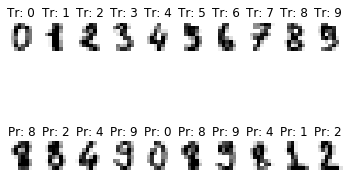

In [5]:
# For the images, we know which digit they represent:
# it is given in the 'target' of the dataset.

ntoplot=10
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:ntoplot]):
  plt.subplot(2, ntoplot, index + 1)
  plt.axis('off')
  plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
  plt.title('Tr: %i' % label)
images_and_predictions = list(zip(digits.images[n_samples // 2:], mytreepredicted))
for index, (image, prediction) in enumerate(images_and_predictions[:ntoplot]):
  plt.subplot(2, ntoplot, index + 1 + ntoplot)
  plt.axis('off')
  plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
  plt.title('Pr: %i' % prediction)
plt.show()



 # Random Forest of Decision Trees

As we just saw, the simple decision tree overfits, and the 
performance is not very good. 
We can improve this by using many trees and taking a majority 
vote on the decision. This helps to improve the performance
of the classifier. 

 https://en.wikipedia.org/wiki/Random_forest 


In [6]:
#!/usr/bin/env python3

# Random Forest
myrf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=69)
myrf.fit(X, Y)
myrfpredicted = myrf.predict(Xtest)

print("Classification report for classifier %s:\n%s\n" % (myrf, metrics.classification_report(Ytest, myrfpredicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(Ytest, myrfpredicted))
print(" \n")

print("Train Score:  %.4f" % myrf.score(X, Y))
print(" Test Score:  %.4f" % myrf.score(Xtest, Ytest))
print(" \n")

Classification report for classifier RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=69, verbose=0,
                       warm_start=False):
              precision    recall  f1-score   support

           0       0.86      0.94      0.90        88
           1       0.88      0.89      0.89        91
           2       0.88      0.90      0.89        86
           3       0.86      0.86      0.86        91
           4       0.94      0.83      0.88        92
           5       0.82      0.87      0.84        91
           6       0.92      0.97      0.94        91
           7       0.89      0.92      0.


 # Visualize the Results

We show the first 10 images and targets (labels) of the training
and test samples.


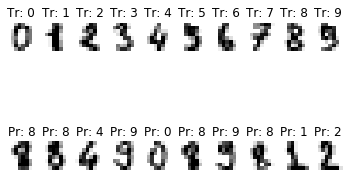

In [7]:
# For the images, we know which digit they represent:
# it is given in the 'target' of the dataset.

ntoplot=10
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:ntoplot]):
  plt.subplot(2, ntoplot, index + 1)
  plt.axis('off')
  plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
  plt.title('Tr: %i' % label)
images_and_predictions = list(zip(digits.images[n_samples // 2:], myrfpredicted))
for index, (image, prediction) in enumerate(images_and_predictions[:ntoplot]):
  plt.subplot(2, ntoplot, index + 1 + ntoplot)
  plt.axis('off')
  plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
  plt.title('Pr: %i' % prediction)
plt.show()



 # Exercises

Data is the bread and butter of machine learning.

 Try to improve the results by splitting the sample 80/20 for
training and testing.

 Hint: use n_samples*8 // 10

 For the decision tree method I got a test score ~ 0.786.
